<h1>Reuters Word Classification Dataset</h1>

<p>First we start by importing the necessary libraries that we will use.</p>

In [1]:
from tensorflow.keras.datasets import reuters
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models 
from keras import layers
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


<p>We import the data using Keras.</p>

In [2]:
(train_data, train_labels) , (test_data, test_labels) = reuters.load_data(num_words = 10000, test_split=0.2)
word_index = reuters.get_word_index()

<p>Let us take a look at the data and fix the number of words.</p>

In [3]:
num_words = 10000

In [4]:
train_data.shape

(8982,)

In [5]:
test_data.shape

(2246,)

In [6]:
train_labels.shape

(8982,)

<p>We trnsform our labels into unit vectors using the following method.</p>

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

<p>Tokenizer will convert the sequence of data into a matrix.</p>

In [8]:
tokenizer = Tokenizer(num_words=num_words)
train_data = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_data = tokenizer.sequences_to_matrix(test_data, mode='binary')

<p>We create our model with 2 hidden layers of 64 nodes and 46 output classes.</p>

In [9]:
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))

<p>We divide our data to training, cross-validation and test data.</p>

In [10]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

validation_data = train_data[:1000]
validation_labels = train_labels[:1000]
train_data = train_data[1000:]
train_labels = train_labels[1000:]

<p>We train the neural network.</p>

In [11]:
training = model.fit(train_data, train_labels, epochs=20, batch_size = 512, validation_data=(validation_data, validation_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 151us/step - loss: 2.5322 - accuracy: 0.4955 - val_loss: 1.7208 - val_accuracy: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 109us/step - loss: 1.4452 - accuracy: 0.6879 - val_loss: 1.3459 - val_accuracy: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 108us/step - loss: 1.0953 - accuracy: 0.7651 - val_loss: 1.1708 - val_accuracy: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 105us/step - loss: 0.8697 - accuracy: 0.8165 - val_loss: 1.0793 - val_accuracy: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 102us/step - loss: 0.7034 - accuracy: 0.8472 - val_loss: 0.9844 - val_accuracy: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 103us/step - loss: 0.5667 - accuracy: 0.8802 - val_loss: 0.9411 - val_accuracy: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 104us/step - loss

In [12]:
training.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

<p>Let us plot our loss and accuracy on training and cross validation to see how well our model did.</p>

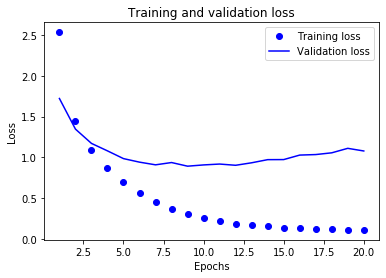

In [13]:
loss = training.history['loss'] 
val_loss = training.history['val_loss'] 
epochs = range(1, len(loss) + 1) # labeling our graph
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

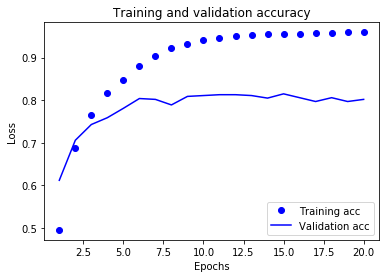

In [14]:
acc = training.history['accuracy'] 
val_acc = training.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

<p>We now evaluate our model on the test data and we make predictions againg on the test data. We make predictions so that we can see the confusion matrix.</p>

In [15]:
evaluate = model.evaluate(test_data,test_labels)

2246/2246 [==============================] - 0s 126us/step


In [16]:
evaluate

[1.235566732613826, 0.7787176966667175]

In [17]:
predictions = model.predict(test_data)

In [18]:
predictions.shape

(2246, 46)

In [19]:
np.sum(predictions[9])

1.0

<p>We create the confusion matrix using sklearn</p>

In [20]:
confusion = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))

In [21]:
pd.set_option('display.max_rows',46)
pd.set_option('display.max_columns',46)

<p>To have a better visual, we convert the confusion matrix into a pandas dataframe.</p>

In [22]:
confusion = pd.DataFrame(confusion)

In [23]:
confusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,6,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,80,0,6,7,0,1,0,0,0,0,4,0,2,2,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,12,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,4,1,762,29,0,0,0,1,1,0,1,0,0,0,0,3,0,0,3,3,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,5,0,31,409,0,1,0,0,0,0,0,0,4,0,0,9,1,1,5,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,4,4,0,0,0,26,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,0,1,0,0,1,0,0,0,1,20,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<p>We are done. We have a confusion matrix we can take a look at in order to prevent possible errors and improve the model. Our accuracy on the test and cross validation is not as good as it is in the training set.</p>